In [38]:
import ipyvolume as ipv
import tyssue
import json
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import random
import sys
import logging
import tyssue.io.hdf5 as hdf5
from IPython.display import Image
from scipy import optimize
from tyssue.draw import sheet_view

from tyssue import Sheet
from tyssue import SheetGeometry

##### Own functions
import src.cellDivisionOld as cellDivisionOld
import src.cellDivision as cellDivision
import src.vertexModel as vertexModel
import src.inputMechanicalParameters as inputMechanicalParameters
import src.auxFunctions as auxFunctions
from tyssue.topology import add_vert

from tyssue.topology.base_topology import add_vert, close_face, collapse_edge, remove_face
from tyssue.topology.base_topology import split_vert as base_split_vert

Topology changed!
Topology changed!


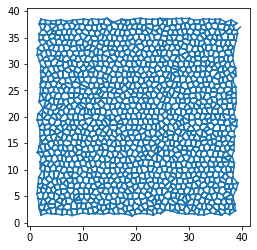

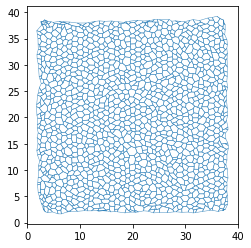

In [39]:
#### Initialize Model
[cellmap_init, geom, energyContributions_model] = vertexModel.initialize()

## Update mechanical parameters
cellmap_init = inputMechanicalParameters.update(cellmap_init)

## Initial stage
energyContributions_model.compute_energy(cellmap_init)

## RUN
[cellmap_H, geom, model_H, history_H] = vertexModel.solveEuler(cellmap_init, geom, energyContributions_model, endTime = 100)


fig, ax = sheet_view(cellmap_H, ['y', 'x'], edge={"color":1, 'colormap': 'Greys'})
#auxFunctions.create_frames(history_H, './results', edge={'color':'black'})
#auxFunctions.exportToMesh(history_H, './results')

import warnings
warnings.filterwarnings("ignore")

In [40]:
### match length_elasticity of opposite edges 

for edge in range(len(cellmap_H.edge_df)):
    
    ### find the opposite edge of each edge in edges_list_without_opposites
    
    opposite_edge_indices = cellmap_H.edge_df[
        (cellmap_H.edge_df["srce"] == cellmap_H.edge_df.loc[edge, "trgt"]) &
        (cellmap_H.edge_df["trgt"] == cellmap_H.edge_df.loc[edge, "srce"])
    ].index
    


    if len(opposite_edge_indices):
            # Update the values for the opposite edges
            cellmap_H.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap_H.edge_df['length_elasticity_ECM'][edge] 
            cellmap_H.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap_H.edge_df['length_elasticity_FRC'][edge] 
            cellmap_H.edge_df['length_elasticity'][opposite_edge_indices] = cellmap_H.edge_df['length_elasticity'][edge]
            
        
        
    
    ### match prefered_length of opposite edges 


for edge in range(len(cellmap_H.edge_df)):
    
    ### find the opposite edge of each edge in edges_list_without_opposites
    
    opposite_edge_indices = cellmap_H.edge_df[
        (cellmap_H.edge_df["srce"] == cellmap_H.edge_df.loc[edge, "trgt"]) &
        (cellmap_H.edge_df["trgt"] == cellmap_H.edge_df.loc[edge, "srce"])
    ].index


    if len(opposite_edge_indices):
            # Update the values for the opposite edges
            cellmap_H.edge_df['prefered_length'][opposite_edge_indices] = cellmap_H.edge_df['prefered_length'][edge] 
            

In [41]:
cellmap_H.edge_df

,trgt,nz,length,face,srce,dx,dy,sx,sy,tx,...,uy,rx,ry,sub_area,is_active,length_elasticity,prefered_length,uz,length_elasticity_ECM,length_elasticity_FRC
edge,,,,,,,,,,,,,,,,,,,,,
0,22,0.323454,0.603346,488,15,-0.512312,0.318689,3.660605,15.364968,3.148293,...,0.528202,0.639227,0.233724,0.161727,1,228.189915,0.896257,0.57735,40.731821,187.458094
1,15,0.346464,0.603346,525,22,0.512312,-0.318689,3.148293,15.683656,3.660605,...,-0.528202,-0.433513,-0.406604,0.173232,1,228.189915,0.896257,0.57735,40.731821,187.458094
2,16,0.350453,0.590254,525,15,0.440504,0.392882,3.660605,15.364968,4.101109,...,0.665615,0.078800,-0.725293,0.175227,1,706.240292,0.685758,0.57735,52.234128,654.006165
3,15,0.376134,0.590254,489,16,-0.440504,-0.392882,4.101109,15.757850,3.660605,...,-0.665615,0.030019,0.880646,0.188067,1,706.240292,0.685758,0.57735,52.234128,654.006165
4,18,0.352993,0.696049,525,16,-0.024784,0.695608,4.101109,15.757850,4.076325,...,0.999366,0.519304,-0.332411,0.176496,1,249.603815,0.482963,0.57735,54.024594,195.579221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8155,2768,0.166167,0.331811,1057,2354,0.297691,-0.146557,11.849983,29.387472,12.147674,...,-0.441689,-0.506066,-0.309042,0.083083,1,1224.416523,0.195883,0.57735,57.737498,1166.679025
8156,2769,0.232455,0.331864,1086,2390,-0.149171,0.296449,4.765462,31.416891,4.616292,...,0.893284,0.631288,0.303746,0.116227,1,804.690170,0.490993,0.57735,52.015702,752.674468
8157,2390,0.268847,0.331864,1125,2769,0.149171,-0.296449,4.616292,31.713339,4.765462,...,-0.893284,-0.786627,-0.239005,0.134423,1,804.690170,0.490993,0.57735,52.015702,752.674468


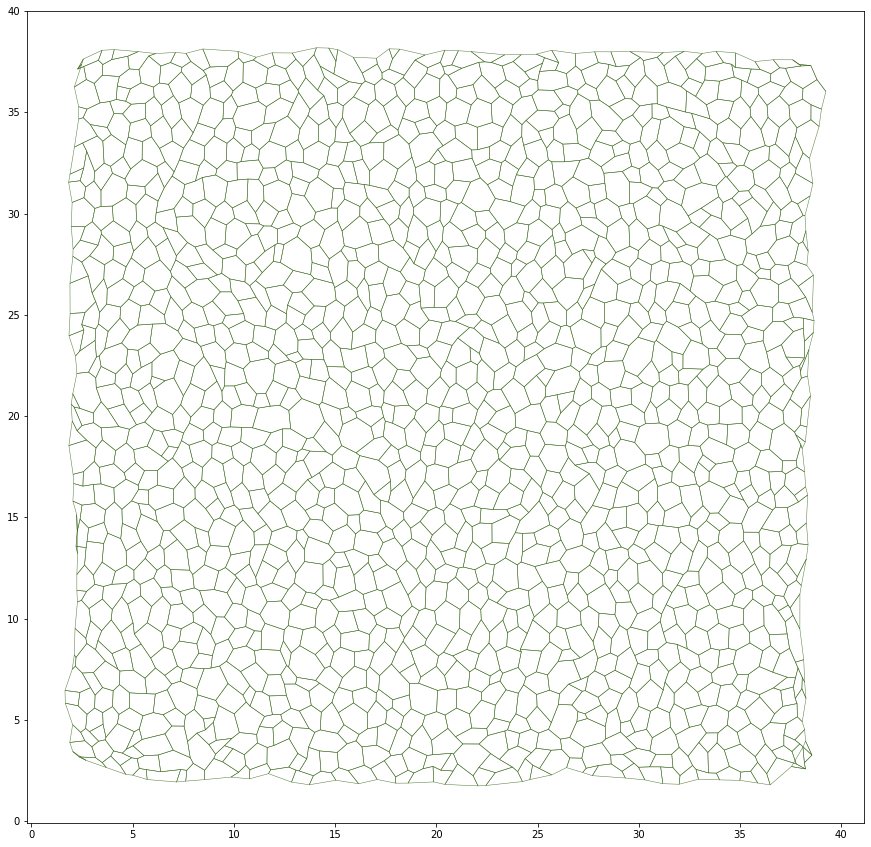

In [42]:
fig, ax = sheet_view(cellmap_H)
fig.set_size_inches((15, 15))
plt.show()

In [16]:
edges_without_opposites_indices, border_edges_indices = cellDivision.edges_list_without_opposites(cellmap_H)
len(edges_without_opposites_indices)

3995

In [43]:
def apoptosis_one_FRC_drop(cellmap, condition):
    
    # Find non-border edges
    edges_without_opposites_indices, border_edges_indices = cellDivision.edges_list_without_opposites(cellmap)
    
    # Choose edge to remove from non-border edges
    edge_to_remove = cellmap.edge_df[~cellmap.edge_df.index.isin(border_edges_indices)][condition].nlargest(1).index.tolist()
    
    srce, trgt = cellmap.edge_df.loc[edge_to_remove[0], ["srce", "trgt"]]
    opposites = cellmap.edge_df[
    (cellmap.edge_df["srce"] == trgt) & (cellmap.edge_df["trgt"] == srce)]
    opp_edge = opposites.index

    
    # Remove the edge_to_remove from edge_df
    cellmap.edge_df = cellmap.edge_df[~cellmap.edge_df.index.isin(edge_to_remove)]
    cellmap.edge_df = cellmap.edge_df[~cellmap.edge_df.index.isin(opp_edge)]

    print('Apoptosis completed')
    # Reset index and topology (adjust as needed)
    cellmap.reset_index()
    cellmap.reset_topo()
    
    # Update geometry
    geom.update_all(cellmap)
    
    energyContributions_model.compute_energy(cellmap_H)
    vertexModel.solveEuler(cellmap_H, geom, energyContributions_model, 40)

    
    return edge_to_remove
    

In [45]:
num_of_loops = 200

loops = set()

for i in range(1, num_of_loops + 1): 
    cellDivision.ln_divide_one_FRC(cellmap_H, "length", energyContributions_model) 
    apoptosis_one_FRC_drop(cellmap_H, "length")
    loops.add(i)
    print(len(loops))
    if len(loops) == num_of_loops:
        break

Chosen edge: 4101
New vert: 2772
New Edge: 8160
New opposite edge: 8161


KeyboardInterrupt: 

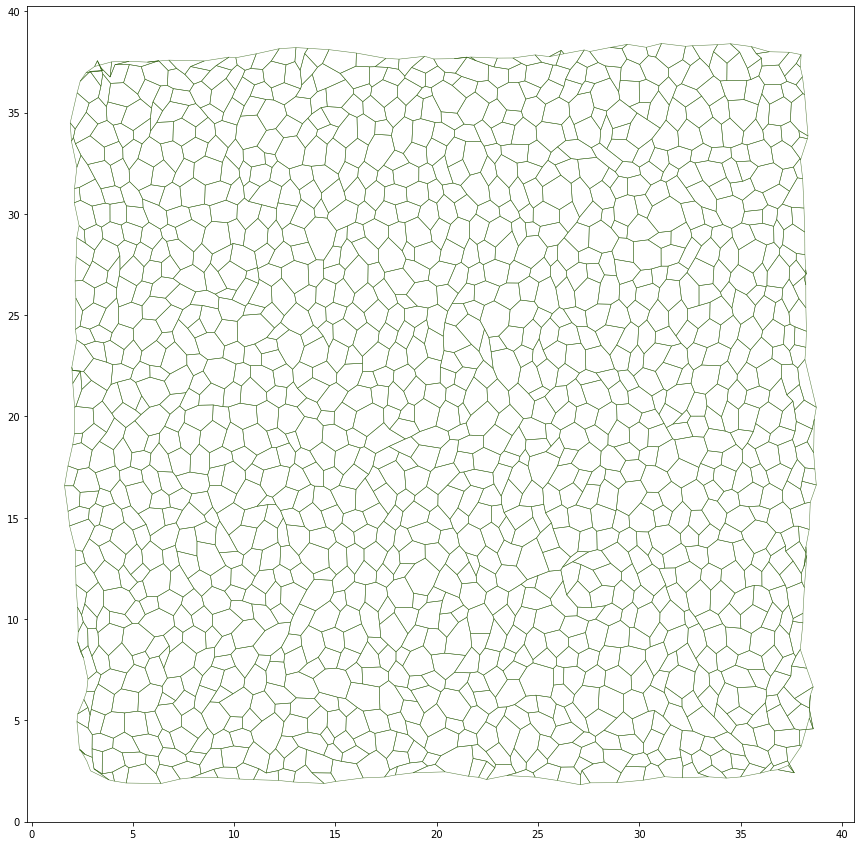

In [34]:
fig, ax = sheet_view(cellmap_H)
fig.set_size_inches((15, 15))
plt.show()

In [35]:
def apoptosis_one_FRC_merge_vertices(cellmap, condition):
    
    # Find non-border edges
    edges_without_opposites_indices, border_edges_indices = cellDivision.edges_list_without_opposites(cellmap)
    
    # Choose edge to remove from non-border edges
    edge_to_remove = cellmap_H.edge_df.loc[edges_without_opposites_indices]["length"].idxmin()

    
    # Remove the edge_to_remove from edge_df
    collapse_edge(cellmap, edge_to_remove, allow_two_sided=False)
    cellmap_H.update_rank()
    
    # Reset index and topology (adjust as needed)
    cellmap.reset_index()
    cellmap.reset_topo()
    
    # Update geometry
    geom.update_all(cellmap)
    
    print('Apoptosis completed')
    
    energyContributions_model.compute_energy(cellmap_H)
    vertexModel.solveEuler(cellmap_H, geom, energyContributions_model, 40)

    return edge_to_remove
    

In [36]:
num_of_loops = 200

loops = set()

for i in range(1, num_of_loops + 1): 
    cellDivision.ln_divide_one_FRC(cellmap_H, "length", energyContributions_model) 
    apoptosis_one_FRC_merge_vertices(cellmap_H, "length")
    loops.add(i)
    print(len(loops))
    if len(loops) == num_of_loops:
        break

Chosen edge: 5526
New vert: 2760
New Edge: 8128
New opposite edge: 8129
Topology changed!
Topology changed!
Apoptosis completed
Topology changed!
1
Chosen edge: 1367
New vert: 2761
New Edge: 8130
New opposite edge: 8131
Apoptosis completed
Topology changed!
Topology changed!
Topology changed!
2
Chosen edge: 753
New vert: 2762
New Edge: 8132
New opposite edge: 8133
Apoptosis completed
Topology changed!
3
Chosen edge: 5494
New vert: 2763
New Edge: 8134
New opposite edge: 8135
Apoptosis completed
Topology changed!
4
Chosen edge: 1257
New vert: 2764
New Edge: 8135
New opposite edge: 8136
Apoptosis completed
Topology changed!
5
Chosen edge: 3002
New vert: 2765
New Edge: 8137
New opposite edge: 8138
Apoptosis completed
Topology changed!
6
Chosen edge: 5672
New vert: 2766
New Edge: 8139
New opposite edge: 8140
Apoptosis completed
Topology changed!
7
Chosen edge: 1367
New vert: 2767
New Edge: 8141
New opposite edge: 8142
Apoptosis completed
Topology changed!
8
Chosen edge: 4683
New vert: 2768


Apoptosis completed
Topology changed!
71
Chosen edge: 7550
New vert: 2830
New Edge: 8259
New opposite edge: 8260
Apoptosis completed
Topology changed!
72
Chosen edge: 430
New vert: 2831
New Edge: 8261
New opposite edge: 8262
Apoptosis completed
Topology changed!
73
Chosen edge: 2707
New vert: 2832
New Edge: 8263
New opposite edge: 8264
Apoptosis completed
Topology changed!
74
Chosen edge: 6152
New vert: 2833
New Edge: 8265
New opposite edge: 8266
Apoptosis completed
Topology changed!
75
Chosen edge: 6868
New vert: 2834
New Edge: 8267
New opposite edge: 8268
Apoptosis completed
Topology changed!
76
Chosen edge: 5972
New vert: 2835
New Edge: 8269
New opposite edge: 8270
Apoptosis completed
Topology changed!
77
Chosen edge: 1883
New vert: 2836
New Edge: 8271
New opposite edge: 8272
Apoptosis completed
Topology changed!
78
Chosen edge: 703
New vert: 2837
New Edge: 8273
New opposite edge: 8274
Apoptosis completed
Topology changed!
79
Chosen edge: 5782
New vert: 2838
New Edge: 8275
New oppos

Apoptosis completed
Topology changed!
143
Chosen edge: 2006
New vert: 2902
New Edge: 8397
New opposite edge: 8398
Apoptosis completed
Topology changed!
144
Chosen edge: 2607
New vert: 2903
New Edge: 8399
New opposite edge: 8400
Apoptosis completed
Topology changed!
145
Chosen edge: 2915
New vert: 2904
New Edge: 8401
New opposite edge: 8402
Apoptosis completed
Topology changed!
146
Chosen edge: 4368
New vert: 2905
New Edge: 8403
New opposite edge: 8404
Apoptosis completed
Topology changed!
147
Chosen edge: 5563
New vert: 2906
New Edge: 8405
New opposite edge: 8406
Apoptosis completed
Topology changed!
148
Chosen edge: 5211
New vert: 2907
New Edge: 8407
New opposite edge: 8408
Apoptosis completed
Topology changed!
149
Chosen edge: 1823
New vert: 2908
New Edge: 8409
New opposite edge: 8410
Apoptosis completed
Topology changed!
150
Chosen edge: 580
New vert: 2909
New Edge: 8410
New opposite edge: 8411
Apoptosis completed
Topology changed!
151
Chosen edge: 1042
New vert: 2910
New Edge: 8412

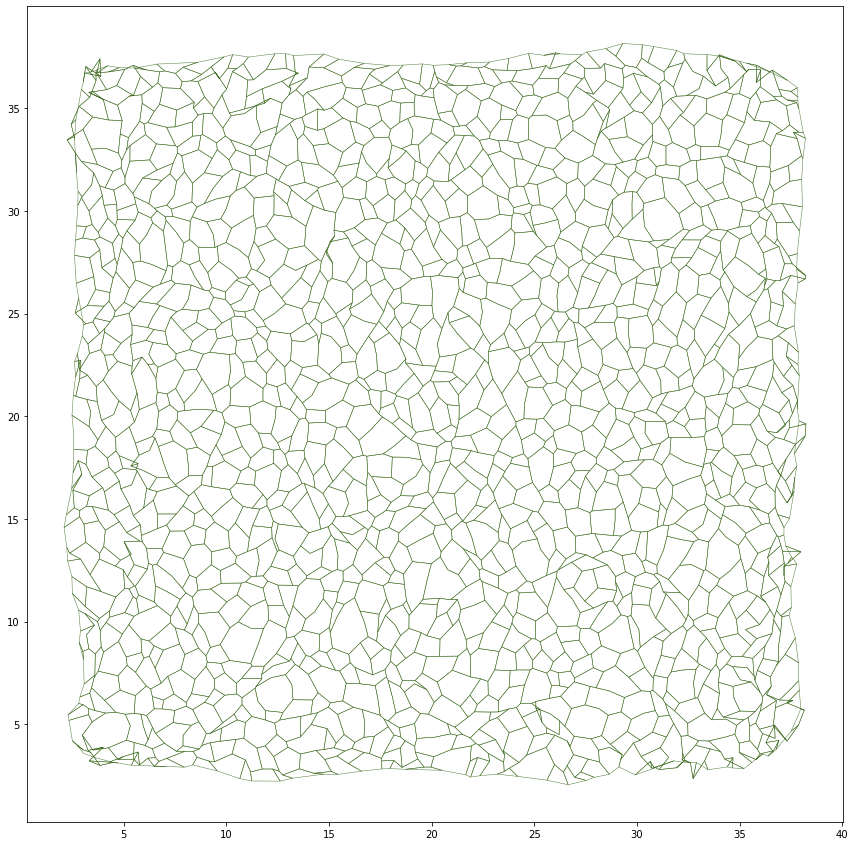

In [37]:
fig, ax = sheet_view(cellmap_H)
fig.set_size_inches((15, 15))
plt.show()